# DBSCAN using motor vibrations

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("vibration_amplitudes.csv") 
data.head()

,Unnamed: 0,asset,asset_location,direction,direction_name,e_plan_id,location,sensor_direction,sensor_id,unit,value,zone
0,2019-06-01 00:01:00+00:00,aandrijfwiel,oost,y,rij,DP_ACC01_Y,RB16,-Y,C01_ACC01,g,0.001522,zone 1
1,2019-06-01 00:01:00+00:00,aandrijfwiel,oost,z,hoogte,DP_ACC01_X,RB16,X,C01_ACC01,g,0.000918,zone 1
2,2019-06-01 00:01:00+00:00,aandrijfwiel,west,y,rij,DP_ACC04_Y,RB16,Y,C01_ACC04,g,0.002704,zone 3
3,2019-06-01 00:01:00+00:00,aandrijfwiel,west,z,hoogte,DP_ACC04_X,RB16,X,C01_ACC04,g,0.002602,zone 3
4,2019-06-01 00:01:00+00:00,meeloopwiel,oost,y,rij,DP_ACC09_Y,RB16,-Y,C01_ACC09,g,0.002736,zone 6


In [2]:
data.rename(columns={'Unnamed: 0':'dt'}, inplace=True)
data['dt'] = data['dt'].map(lambda x: str(x)[:-6])
data['dt'] = pd.to_datetime(data['dt'])
data.head()

,dt,asset,asset_location,direction,direction_name,e_plan_id,location,sensor_direction,sensor_id,unit,value,zone
0,2019-06-01 00:01:00,aandrijfwiel,oost,y,rij,DP_ACC01_Y,RB16,-Y,C01_ACC01,g,0.001522,zone 1
1,2019-06-01 00:01:00,aandrijfwiel,oost,z,hoogte,DP_ACC01_X,RB16,X,C01_ACC01,g,0.000918,zone 1
2,2019-06-01 00:01:00,aandrijfwiel,west,y,rij,DP_ACC04_Y,RB16,Y,C01_ACC04,g,0.002704,zone 3
3,2019-06-01 00:01:00,aandrijfwiel,west,z,hoogte,DP_ACC04_X,RB16,X,C01_ACC04,g,0.002602,zone 3
4,2019-06-01 00:01:00,meeloopwiel,oost,y,rij,DP_ACC09_Y,RB16,-Y,C01_ACC09,g,0.002736,zone 6


In [3]:
vib03x=data[(data['sensor_id'] == 'C01_ACC03') & (data['direction'] == 'x')]
vib03x.head()

,dt,asset,asset_location,direction,direction_name,e_plan_id,location,sensor_direction,sensor_id,unit,value,zone
8,2019-06-01 00:01:00,motor,oost,x,kat,DP_ACC03_X,RB16,-X,C01_ACC03,g,0.002130,zone 1
27,2019-06-01 00:02:00,motor,oost,x,kat,DP_ACC03_X,RB16,-X,C01_ACC03,g,0.004321,zone 1
46,2019-06-01 00:03:00,motor,oost,x,kat,DP_ACC03_X,RB16,-X,C01_ACC03,g,0.000927,zone 1
65,2019-06-01 00:04:00,motor,oost,x,kat,DP_ACC03_X,RB16,-X,C01_ACC03,g,0.000748,zone 1
84,2019-06-01 00:05:00,motor,oost,x,kat,DP_ACC03_X,RB16,-X,C01_ACC03,g,0.000870,zone 1


In [4]:
vib06x=data[(data['sensor_id'] == 'C01_ACC06') & (data['direction'] == 'x')]
vib06x.head()

,dt,asset,asset_location,direction,direction_name,e_plan_id,location,sensor_direction,sensor_id,unit,value,zone
9,2019-06-01 00:01:00,motor,west,x,kat,DP_ACC06_X,RB16,X,C01_ACC06,g,0.007606,zone 3
28,2019-06-01 00:02:00,motor,west,x,kat,DP_ACC06_X,RB16,X,C01_ACC06,g,0.011812,zone 3
47,2019-06-01 00:03:00,motor,west,x,kat,DP_ACC06_X,RB16,X,C01_ACC06,g,0.000539,zone 3
66,2019-06-01 00:04:00,motor,west,x,kat,DP_ACC06_X,RB16,X,C01_ACC06,g,0.000494,zone 3
85,2019-06-01 00:05:00,motor,west,x,kat,DP_ACC06_X,RB16,X,C01_ACC06,g,0.000450,zone 3


In [5]:
vib03x = vib03x[['dt','value']]
vib03x.rename(columns={'value':'vib03x'}, inplace=True)
vib06x = vib06x[['dt','value']]
vib06x.rename(columns={'value':'vib06x'}, inplace=True)

In [6]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='NourS', api_key='1t34V3fNQKSwZ2vM9VrW')

In [7]:
dataPlot = [go.Scatter(x=vib03x['dt'], y=vib03x['vib03x'], name='vib03x'),
           go.Scatter(x=vib06x['dt'],y=vib06x['vib06x'], name='vib06x')
           ]
layout = go.Layout(
    title='vibx 3&6',
    
    yaxis=dict(title='vibx3-6'),
)

fig = go.Figure(data=dataPlot, layout=layout)
plotly.offline.plot(fig, filename='vibx3-6.html')

'vibx3-6.html'

In [11]:
vib06x.describe()

,vib06x
count,2.993900e+04
mean,1.479987e+33
std,2.529302e+35
min,5.456255e-05
25%,3.889591e-04
50%,6.945980e-03
75%,1.085877e-02
max,4.376081e+37


In [12]:
vib06x[vib06x['vib06x']>1]

,dt,vib06x
116241,2019-06-05 09:40:00,4.376081e+37
116253,2019-06-05 09:41:00,5.485327e+35


In [13]:
vib06x.loc[vib06x['dt'] == '2019-06-05 09:40:00', 'vib06x'] = vib06x['vib06x'].median()
vib06x.loc[vib06x['dt'] == '2019-06-05 09:41:00', 'vib06x'] = vib06x['vib06x'].median()

In [14]:
vib06x.describe()

,vib06x
count,29939.000000
mean,0.006641
std,0.005033
min,0.000055
25%,0.000389
50%,0.006946
75%,0.010859
max,0.047991


In [15]:
dataPlot = [go.Scatter(x=vib03x['dt'], y=vib03x['vib03x'], name='vib03x'),
           go.Scatter(x=vib06x['dt'],y=vib06x['vib06x'], name='vib06x')
           ]
layout = go.Layout(
    title='vibx 3&6',
    
    yaxis=dict(title='vibx3-6'),
)

fig = go.Figure(data=dataPlot, layout=layout)
plotly.offline.plot(fig, filename='vibx3-6.html')

'vibx3-6.html'

In [16]:
vib03x.describe()

,vib03x
count,30100.000000
mean,0.004510
std,0.003264
min,0.000060
25%,0.000463
50%,0.005060
75%,0.007053
max,0.020903


In [17]:
vib03z=data[(data['sensor_id'] == 'C01_ACC03') & (data['direction'] == 'z')]
vib03z.head()

,dt,asset,asset_location,direction,direction_name,e_plan_id,location,sensor_direction,sensor_id,unit,value,zone
180,2019-06-01 00:10:00,motor,oost,z,hoogte,DP_ACC03_Z,RB16,Z,C01_ACC03,g,0.014499,zone 1
238,2019-06-01 00:13:00,motor,oost,z,hoogte,DP_ACC03_Z,RB16,Z,C01_ACC03,g,0.008838,zone 1
372,2019-06-01 00:20:00,motor,oost,z,hoogte,DP_ACC03_Z,RB16,Z,C01_ACC03,g,0.009118,zone 1
411,2019-06-01 00:22:00,motor,oost,z,hoogte,DP_ACC03_Z,RB16,Z,C01_ACC03,g,0.002613,zone 1
431,2019-06-01 00:23:00,motor,oost,z,hoogte,DP_ACC03_Z,RB16,Z,C01_ACC03,g,0.009670,zone 1


In [18]:
vib06z=data[(data['sensor_id'] == 'C01_ACC06') & (data['direction'] == 'z')]
vib06z.head()

,dt,asset,asset_location,direction,direction_name,e_plan_id,location,sensor_direction,sensor_id,unit,value,zone
10,2019-06-01 00:01:00,motor,west,z,hoogte,DP_ACC06_Z,RB16,Z,C01_ACC06,g,0.005504,zone 3
29,2019-06-01 00:02:00,motor,west,z,hoogte,DP_ACC06_Z,RB16,Z,C01_ACC06,g,0.008140,zone 3
48,2019-06-01 00:03:00,motor,west,z,hoogte,DP_ACC06_Z,RB16,Z,C01_ACC06,g,0.000603,zone 3
67,2019-06-01 00:04:00,motor,west,z,hoogte,DP_ACC06_Z,RB16,Z,C01_ACC06,g,0.000514,zone 3
86,2019-06-01 00:05:00,motor,west,z,hoogte,DP_ACC06_Z,RB16,Z,C01_ACC06,g,0.000556,zone 3


In [23]:
vib03z = vib03z[['dt','value']]
vib03z.rename(columns={'value':'vib0zx'}, inplace=True)
vib06z = vib06z[['dt','value']]
vib06z.rename(columns={'value':'vib06z'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [24]:
vib06z[vib06z['vib06z']>1]

,dt,vib06z
116242,2019-06-05 09:40:00,1.586166e+34
116254,2019-06-05 09:41:00,3.004810e+36
116271,2019-06-05 09:42:00,2.612665e+33


In [26]:
vib06z.loc[vib06z['dt'] == '2019-06-05 09:40:00', 'vib06z'] = vib06z['vib06z'].median()
vib06z.loc[vib06z['dt'] == '2019-06-05 09:41:00', 'vib06z'] = vib06z['vib06z'].median()
vib06z.loc[vib06z['dt'] == '2019-06-05 09:42:00', 'vib06z'] = vib06z['vib06z'].median()

In [29]:
vib06z.describe()

,vib06z
count,29935.000000
mean,0.007142
std,0.005170
min,0.000118
25%,0.000357
50%,0.008499
75%,0.011363
max,0.054147


In [35]:
vibz = pd.merge(vib03z, vib06z, how='inner', on=['dt'])
vibz.head()

,dt,vib0zx,vib06z
0,2019-06-01 00:10:00,0.014499,0.010084
1,2019-06-01 00:13:00,0.008838,0.012609
2,2019-06-01 00:20:00,0.009118,0.008455
3,2019-06-01 00:22:00,0.002613,0.006319
4,2019-06-01 00:23:00,0.009670,0.004371


In [37]:
vibzCorr = vibz['vib0zx'].corr(vibz['vib06z'])

In [38]:
vibzCorr

0.8937216396919894

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
cleanvibz = vibz[['vib0zx','vib06z']]
cleanvibz.head()

,vib0zx,vib06z
0,0.014499,0.010084
1,0.008838,0.012609
2,0.009118,0.008455
3,0.002613,0.006319
4,0.009670,0.004371


In [151]:
dbsc = DBSCAN(eps = .0005, min_samples = 5).fit(cleanvibz)

In [152]:
labels = dbsc.labels_
core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool) 
core_samples_mask[dbsc.core_sample_indices_] = True

In [153]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
print(labels) 


[0 0 0 ... 0 0 0]


In [154]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [156]:
unique_labels = set(labels) 
colors = ['b', 'g', 'r', 'y', 'c', 'm', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700'] 
print(colors) 

['b', 'g', 'r', 'y', 'c', 'm', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700', '#ff7700']


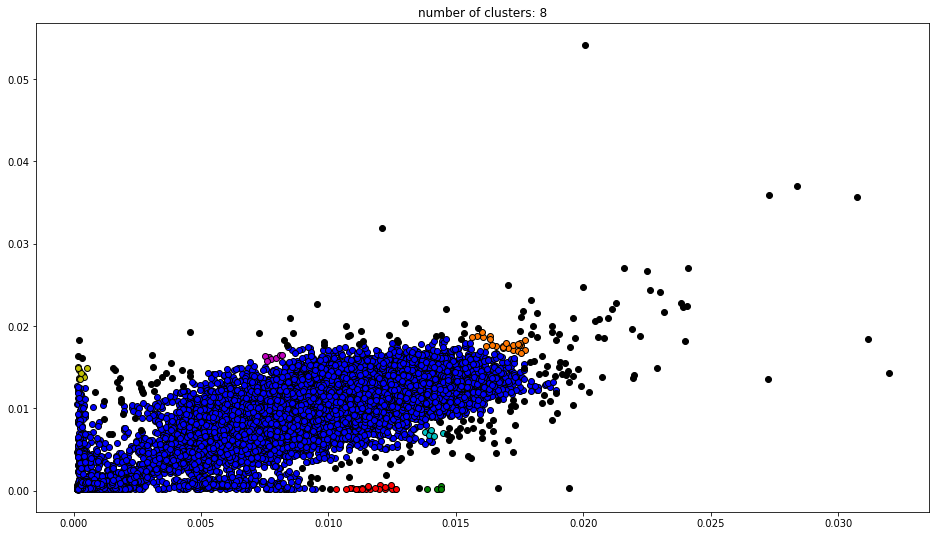

In [157]:
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = cleanvibz[class_member_mask & core_samples_mask] 
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6) 
  
    xy = cleanvibz[class_member_mask & ~core_samples_mask] 
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 

plt.rcParams["figure.figsize"] = [16,9]

plt.title('number of clusters: %d' %n_clusters_)

plt.show() 

In [158]:
dataPlot = [go.Scatter(x=vibz['vib0zx'], y=vibz['vib06z'], name='vibz',
    mode = 'markers')]

layout = go.Layout(
    title='vibz 3&6',
    
    yaxis=dict(title='vibz3-6'),
)

fig = go.Figure(data=dataPlot, layout=layout)
plotly.offline.plot(fig, filename='vibz3to6.html')

'vibz3to6.html'

In [161]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [163]:
vibz[labels == 7].describe()

,vib0zx,vib06z
count,6.000000,6.000000
mean,0.016033,0.018718
std,0.000274,0.000274
min,0.015635,0.018368
25%,0.015879,0.018620
50%,0.016034,0.018690
75%,0.016252,0.018745
max,0.016343,0.019203
